In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/Anissa/building_blocks/notebooks/karen_building_blocks_analysis'

In [2]:
import numpy as np
#!pip install matplotlib
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.archetypes import ArchetypalAnalysis
from src.utils.visualization import plot_scatter_pca, plot_3Dscatter_pca, archetypes_bar_plot, archetype_simple_plot
from src.utils.equations import arch2color, alfa2rgb, scale, color_mapper

In [11]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../../../fabio/output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)


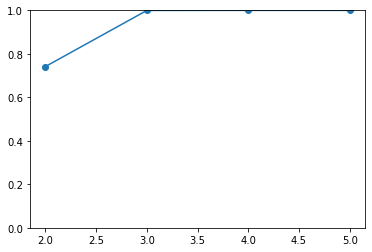

In [12]:
n_archs = list(range(2, 6))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(pc[:, :2])
    lst_exp_var.append(AA.explained_variance_)

plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [13]:
AA = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [14]:
AA.fit_transform(pc[:, :2])

array([[ 4.48636634e+01,  1.18921622e+01],
       [-3.34300676e+01,  2.06371395e+02],
       [ 4.90555186e+01,  1.99259929e+01],
       [ 2.21370315e+01, -2.60569744e+00],
       [ 4.02796295e+01,  5.00669418e+01],
       [-2.48820763e+01,  1.52866317e+02],
       [ 3.57308195e+01,  1.19267647e+01],
       [-1.68736575e+01,  1.33467801e+02],
       [-6.73540437e+01,  2.44934733e+02],
       [-1.76795558e+01,  1.47341116e+02],
       [ 4.25882240e+01, -6.69448126e-01],
       [ 9.64363122e+00,  6.15766628e+01],
       [ 2.14846071e+01, -2.19334530e+00],
       [ 2.12375285e+01,  2.07223267e+01],
       [ 3.42513930e+01,  9.81884111e+00],
       [-4.11828752e+01,  2.34708719e+02],
       [ 3.60088911e+01,  1.22479579e+01],
       [ 5.63916227e+01,  3.14588667e+00],
       [ 4.28136778e+01,  1.44025694e+00],
       [ 6.54530229e-01,  1.21555823e+02],
       [ 4.37065404e+01, -2.86001503e+00],
       [ 5.68612967e+01,  8.40067814e+00],
       [ 4.67692906e+01, -4.08098171e+00],
       [ 1.

In [15]:
print(AA.alfa)
print(AA.alfa.shape)
print(AA.alfa[:, 0])

[[0.05392455 0.4672919  0.06862902 ... 0.02904166 0.00289051 0.00211831]
 [0.5799453  0.30023178 0.59254186 ... 0.26616661 0.5875063  0.12422331]
 [0.36613015 0.23247632 0.33882912 ... 0.70479173 0.40960319 0.87365837]]
(3, 500)
[0.05392455 0.5799453  0.36613015]


In [16]:
np.max(AA.alfa), np.min(AA.alfa)

(1.0000166327270263, 0.0)

In [17]:
#sites_archetype = list(map(arch2color, np.argmax(AA.alfa, axis=0)))
def get_one(v):
    return v if v <= 1.0 else 1.0
sites_archetype = [(get_one(c[0]),get_one(c[1]),get_one(c[2])) for c in AA.alfa.T]

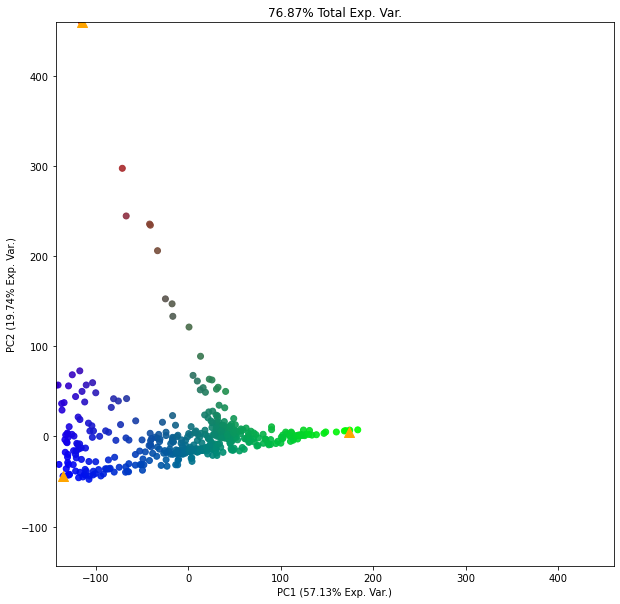

In [18]:
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=sites_archetype, original_axis=None, archetypes=AA.archetypes, cell_type=None)

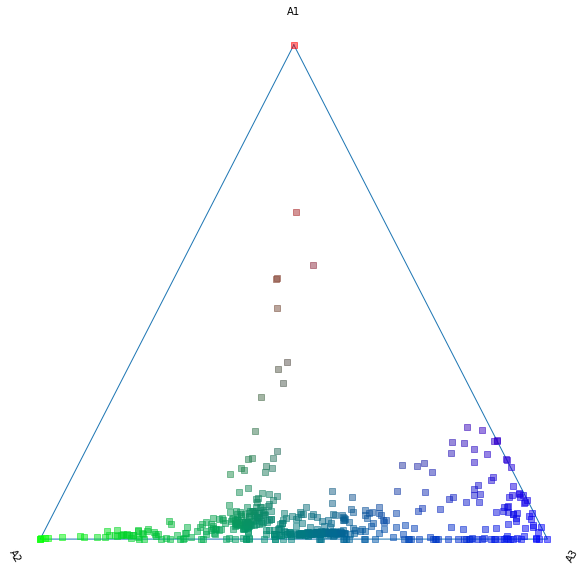

In [19]:
AA.plot_simplex(AA.alfa, plot_args={'c': sites_archetype})

In [20]:
AA.archetypes

array([[-115.68772907,  173.76973301, -135.67543299],
       [ 459.97836863,    5.503024  ,  -43.98276827]])

In [21]:
n_comp = 2
res = np.dot(AA.archetypes.T, pca.components_[:n_comp,:])+np.mean(sites, axis=0)

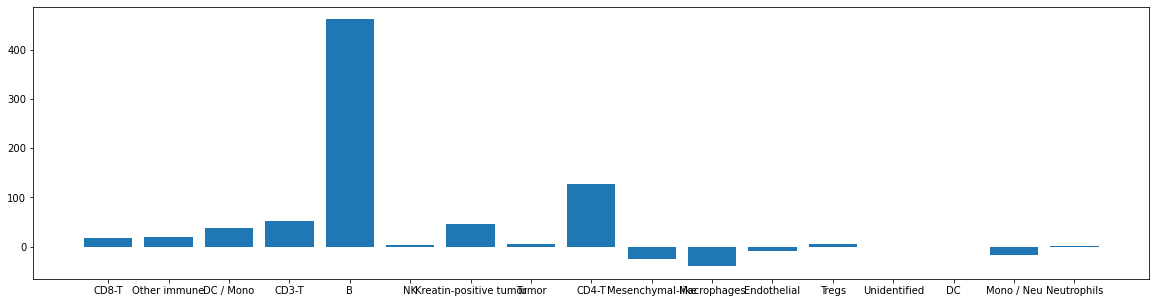

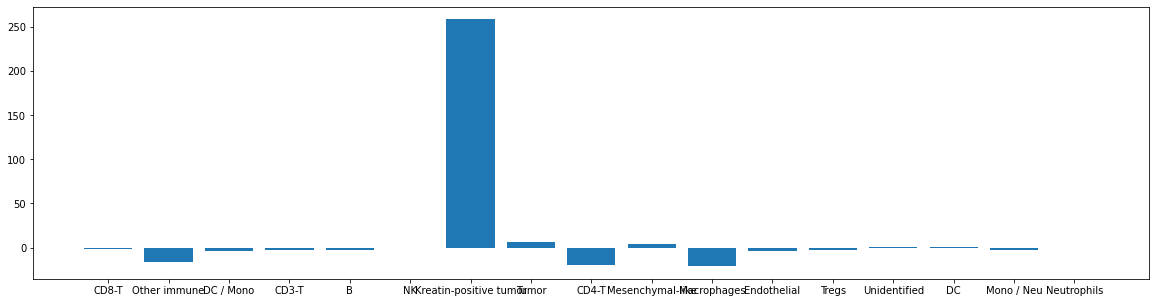

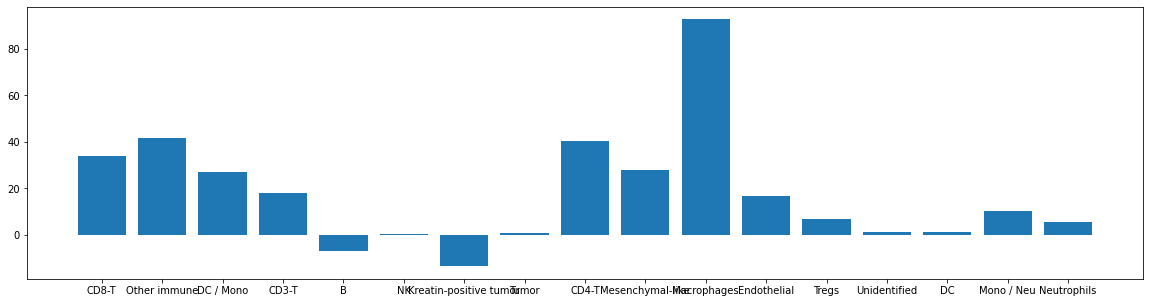

In [22]:
for a in range(3):
    plt.figure(figsize=(20, 5))
    y_pos = np.arange(len(res[a]))
    plt.bar(y_pos, res[a])
    plt.xticks(y_pos, CELL_TYPES)
    #plt.xlabel('Patient ID')
    #plt.ylabel("Relative Error")
    #plt.title("Relative misfit error for every patient")

### 3D Archetypes - All tumors

In [23]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../../../fabio/output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites)

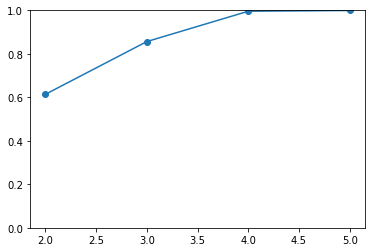

In [24]:
n_archs = list(range(2, 6))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                            
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(pc3d[:, :3])
    lst_exp_var.append(AA.explained_variance_)

plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

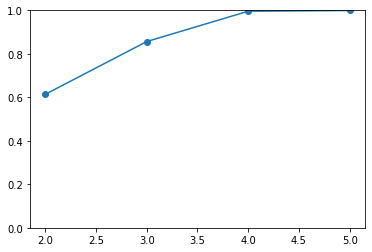

In [23]:
plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [25]:
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])

array([[  1.95653987,   2.36266106, -17.52568754],
       [127.02495066, 221.26933223, -97.73633022],
       [ 48.57234116,  92.33384106, -55.96297117],
       ...,
       [ 63.81784863, -38.34647983, -29.43282716],
       [117.05762532, -46.23498977, -13.04172496],
       [ 78.97883376, -40.8720083 , -16.85526154]])

In [26]:
np.array([0, 153, 51]) / 255

array([0. , 0.6, 0.2])

In [27]:
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
p = np.array(sites_archetype)
p[p > 1]

array([], dtype=float64)

0.87% Total Exp. Var.


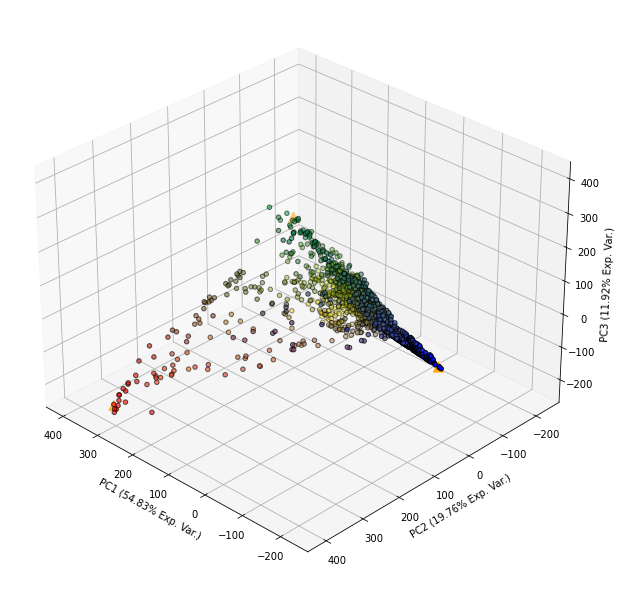

In [28]:
#%matplotlib notebook
plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes)

In [41]:
print(pc3d.shape)
#print([*range(1,11)])
#print(AA_3D.alfa.T.shape)
#print(AA_3D.alfa.T[:,0])
print(sites.T.shape)

(4000, 17)
(17, 4000)


In [39]:
#print(AA_3D.alfa.T[:,2])
#AA_3D.alfa.T[:,0].round(5)+AA_3D.alfa.T[:,1].round(5)+AA_3D.alfa.T[:,2].round(5)+AA_3D.alfa.T[:,3].round(5)

[3.21223769e-01 1.80966310e-01 2.72595189e-01 ... 1.28641189e-01
 2.54126973e-04 9.55447980e-02]


array([1.     , 1.00001, 1.00001, ..., 0.99999, 0.99999, 1.     ])

In [42]:
# We save our outputs (3D PCA and cell abundance per site) in dataframes
# They will be used for further analyses

print(len(patients_ids))
%matplotlib notebook
dict1={'site_ID' :range(1,4001),
       'patient_ID':patients_ids,
       'PC1': pc3d[:,0],
       'PC2': pc3d[:,1],
       'PC3': pc3d[:,2],
       'arch1_prob':AA_3D.alfa.T[:,0].tolist(),'arch2_prob': AA_3D.alfa.T[:,1].tolist(),
       'arch3_prob': AA_3D.alfa.T[:,2].tolist(),'arch4_prob': AA_3D.alfa.T[:,3].tolist()}

archetypes_sites_df = pd.DataFrame(dict1)


'''
## Checking that we have the right data through a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(archetypes_sites_df['PC1'],archetypes_sites_df['PC2'],
           archetypes_sites_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
'''
sites_cell_abund_df = pd.DataFrame(sites,columns = CELL_TYPES)
sites_cell_abund_df['site_ID'] = range(1,4001)
sites_cell_abund_df['patient_ID'] = patients_ids
print(sites_cell_abund_df)

#print(AA_3D.alfa.T[:,0]+AA_3D.alfa.T[:,1]+ AA_3D.alfa.T[:,2]+AA_3D.alfa.T[:,3])

4000
      CD8-T  Other immune  DC / Mono  CD3-T    B  NK  Kreatin-positive tumor  \
0         8             8         13     18   17   0                     128   
1         7             5         10     25  286   0                      73   
2        10            12          2     14  133   2                     108   
3         2             8          9      9    5   0                     140   
4        17            11         19     31  154   0                     114   
...     ...           ...        ...    ...  ...  ..                     ...   
3995     29            15         30     13    2   2                      74   
3996     14            19         49      6    8   2                      87   
3997     12            27          9     21    4   5                      60   
3998     37            42         25     33    9   3                      13   
3999     19            16         26     19    3   0                      48   

      Tumor  CD4-T  Mesenchymal-li

In [43]:
# Dataframes are sotred in csv files

archetypes_sites_df.to_csv('../../archetypes_sites.csv',index = False)
sites_cell_abund_df.to_csv('../../cell_abund_sites.csv',index = False)

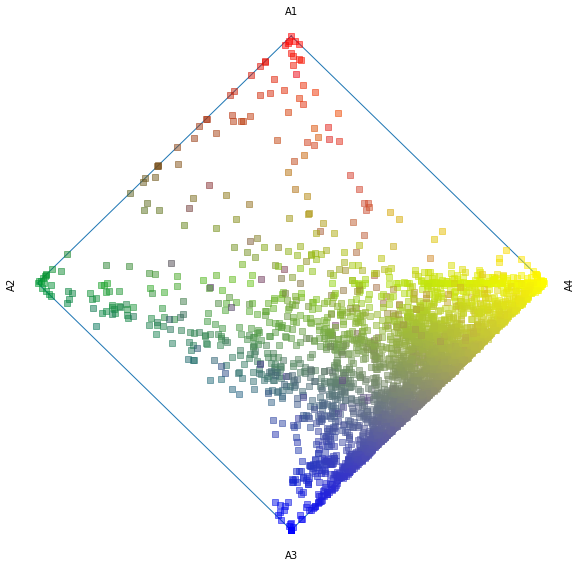

In [7]:
AA_3D.plot_simplex(AA_3D.alfa, plot_args={'c': sites_archetype})

In [6]:
n_comp = 3
res = np.dot(AA_3D.archetypes.T, pca_3d.components_[:n_comp,:])+np.mean(sites, axis=0)

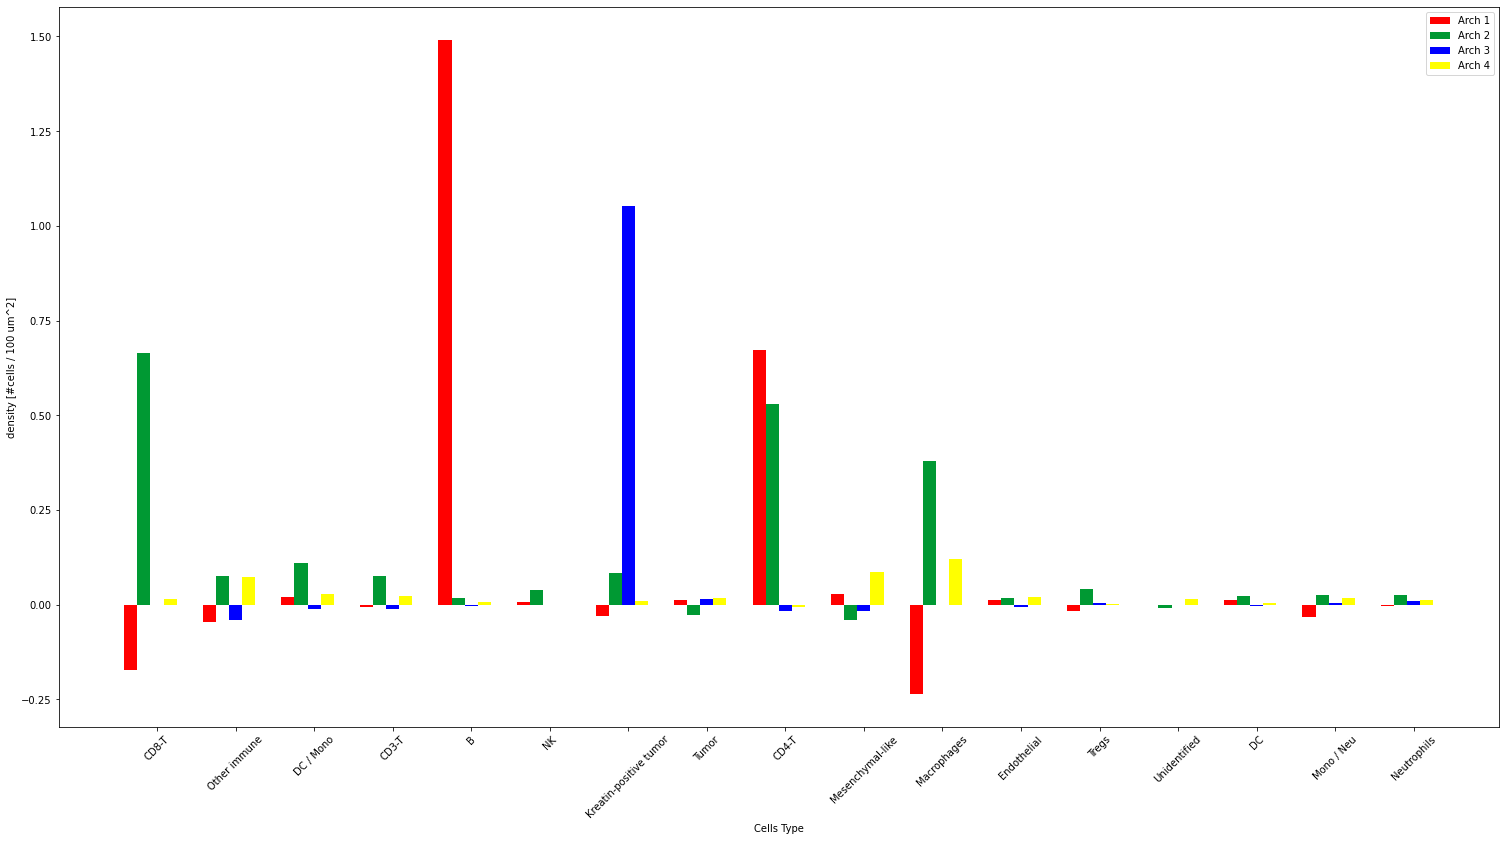

In [7]:
archetype_colors = [[1., 0., 0.], [0. , 0.6, 0.2], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)

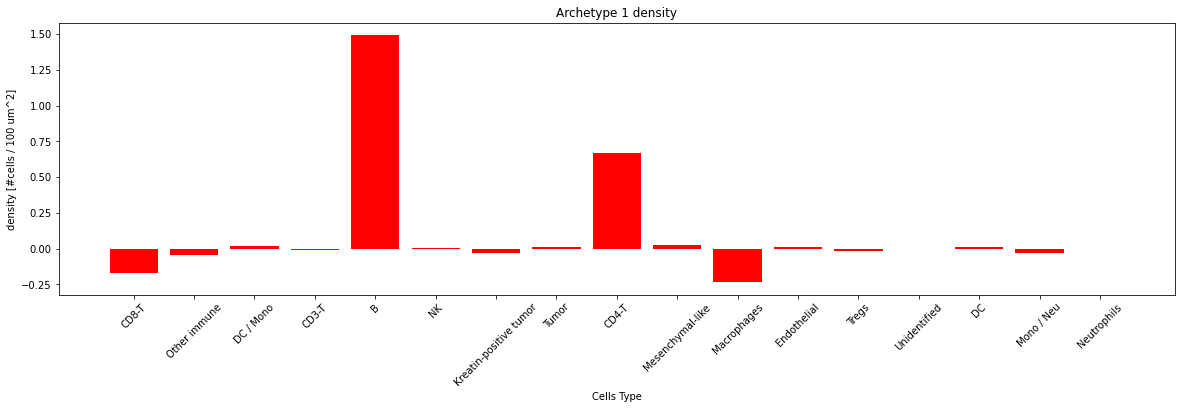

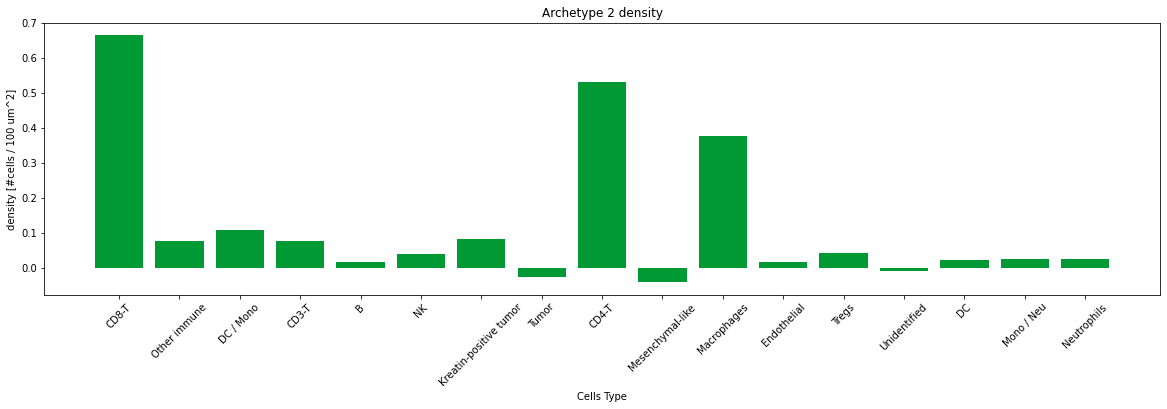

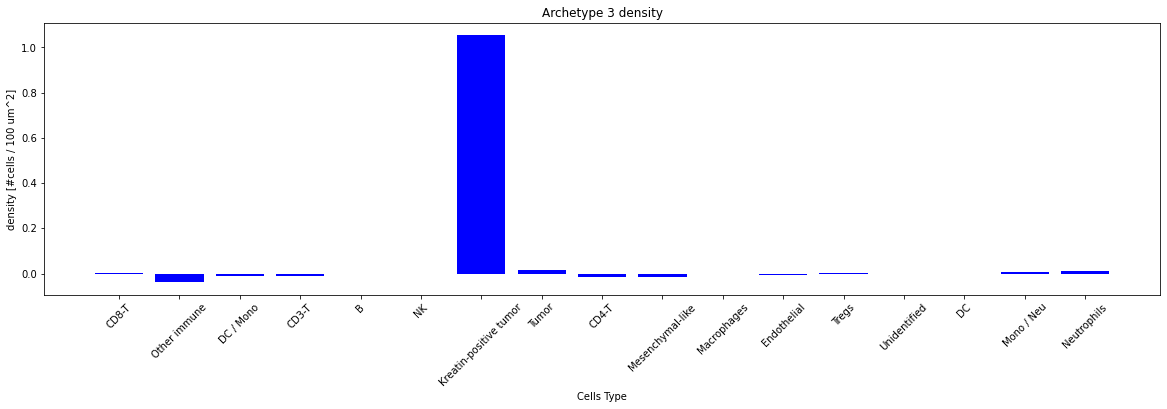

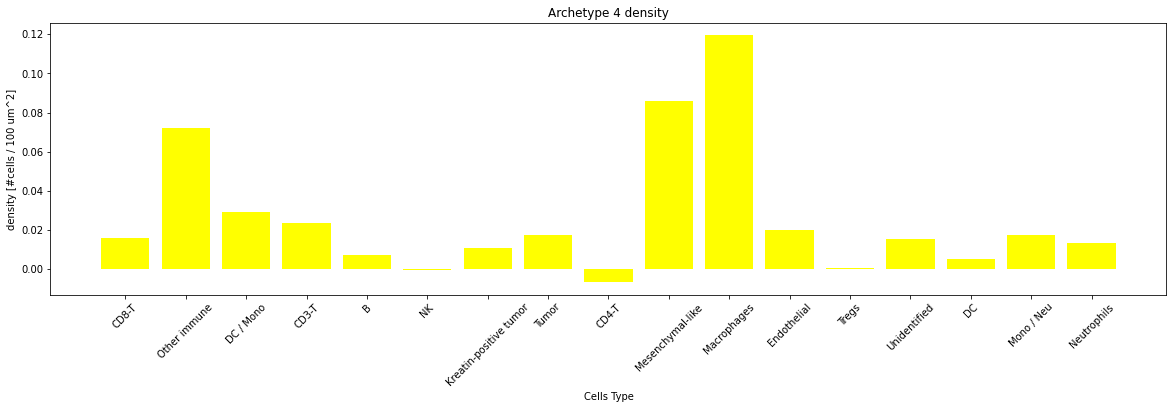

In [11]:
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density')

In [ ]:
d = np.array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)
print(d)
new_pc = pca_3d.transform(d)
AA_3D.transform(new_pc[:, :3])

In [ ]:
import pickle
with open("pca_3d", "wb") as f:
    pickle.dump(pca_3d, f)

with open("AA_3D", "wb") as f:
    pickle.dump(AA_3D, f)

### Sites Archetypes

In [ ]:
AA_sites = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [ ]:
AA_sites.fit_transform(sites)

In [ ]:
sites_archetype = list(map(arch2color, np.argmax(AA_sites.alfa, axis=0)))
AA_sites.plot_simplex(AA_sites.alfa, plot_args={'color': sites_archetype})

In [ ]:
AA_sites.plot_profile(CELL_TYPES)